<a href="https://colab.research.google.com/github/Mochoye/Time_Forecasting_Using_MachineLearning/blob/main/Time_Analysis_And_Forecasting_using_Prophet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,MUMBAI,13200,250,650,450
1,03/Jan/2005,MUMBAI,11700,250,650,450
2,05/Jan/2005,MUMBAI,12100,250,650,450
3,06/Jan/2005,MUMBAI,9130,200,650,425
4,07/Jan/2005,MUMBAI,9350,200,700,450
...,...,...,...,...,...,...
4328,29/Mar/2022,MUMBAI,9007,1000,1800,1400
4329,30/Mar/2022,MUMBAI,9442,1000,1900,1450
4330,31/Mar/2022,MUMBAI,5606,1100,1900,1500
4331,01/Apr/2022,MUMBAI,7754,1100,1900,1500


In [ ]:
#type(df)

In [ ]:
#len(df)

In [ ]:
#df[3]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4332 non-null   object
 1   Market                4333 non-null   object
 2   Arrival(q)            4333 non-null   int64 
 3   Price Minimum (Rs/q)  4333 non-null   object
 4   Price Maximum (Rs/q)  4333 non-null   object
 5   Modal Price (Rs/q)    4333 non-null   object
dtypes: int64(1), object(5)
memory usage: 203.2+ KB


In [ ]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
df=df.dropna()


In [ ]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
df.tail()

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
4327,28/Mar/2022,MUMBAI,14938,1000,1800,1400
4328,29/Mar/2022,MUMBAI,9007,1000,1800,1400
4329,30/Mar/2022,MUMBAI,9442,1000,1900,1450
4330,31/Mar/2022,MUMBAI,5606,1100,1900,1500
4331,01/Apr/2022,MUMBAI,7754,1100,1900,1500


In [ ]:
df.to_csv('crop_data.csv')

In [ ]:
df.rename(columns={'Modal Price (Rs/q)':'y','Date':'ds'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4332 entries, 0 to 4331
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4332 non-null   object
 1   Market                4332 non-null   object
 2   Arrival(q)            4332 non-null   int64 
 3   Price Minimum (Rs/q)  4332 non-null   object
 4   Price Maximum (Rs/q)  4332 non-null   object
 5   y                     4332 non-null   object
dtypes: int64(1), object(5)
memory usage: 236.9+ KB


In [ ]:
df_new=df[['ds','y']]
df_new

,ds,y
0,01/Jan/2005,450
1,03/Jan/2005,450
2,05/Jan/2005,450
3,06/Jan/2005,425
4,07/Jan/2005,450
...,...,...
4327,28/Mar/2022,1400
4328,29/Mar/2022,1400
4329,30/Mar/2022,1450
4330,31/Mar/2022,1500


In [ ]:
df_new['ds']=pd.to_datetime(df_new['ds'])
df_new['y']=df_new['y'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4332 non-null   datetime64[ns]
 1   y       4332 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.5 KB


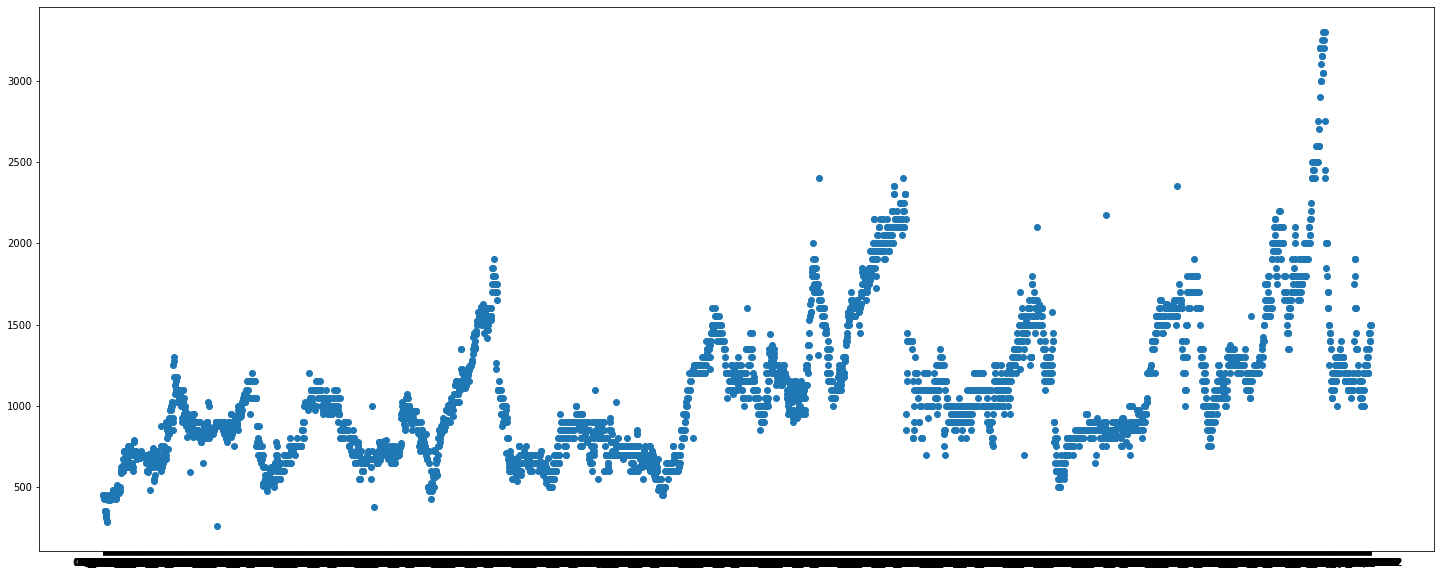

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25,10))
plt.scatter(df['ds'],df_new['y'])
plt.show()

In [ ]:
 import numpy as numpy
 df_new['y']=np.where(df_new['y']>2500,np.nan,df_new['y'])
 df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2005-01-01,450.0
1,2005-01-03,450.0
2,2005-01-05,450.0
3,2005-01-06,425.0
4,2005-01-07,450.0
...,...,...
4327,2022-03-28,1400.0
4328,2022-03-29,1400.0
4329,2022-03-30,1450.0
4330,2022-03-31,1500.0


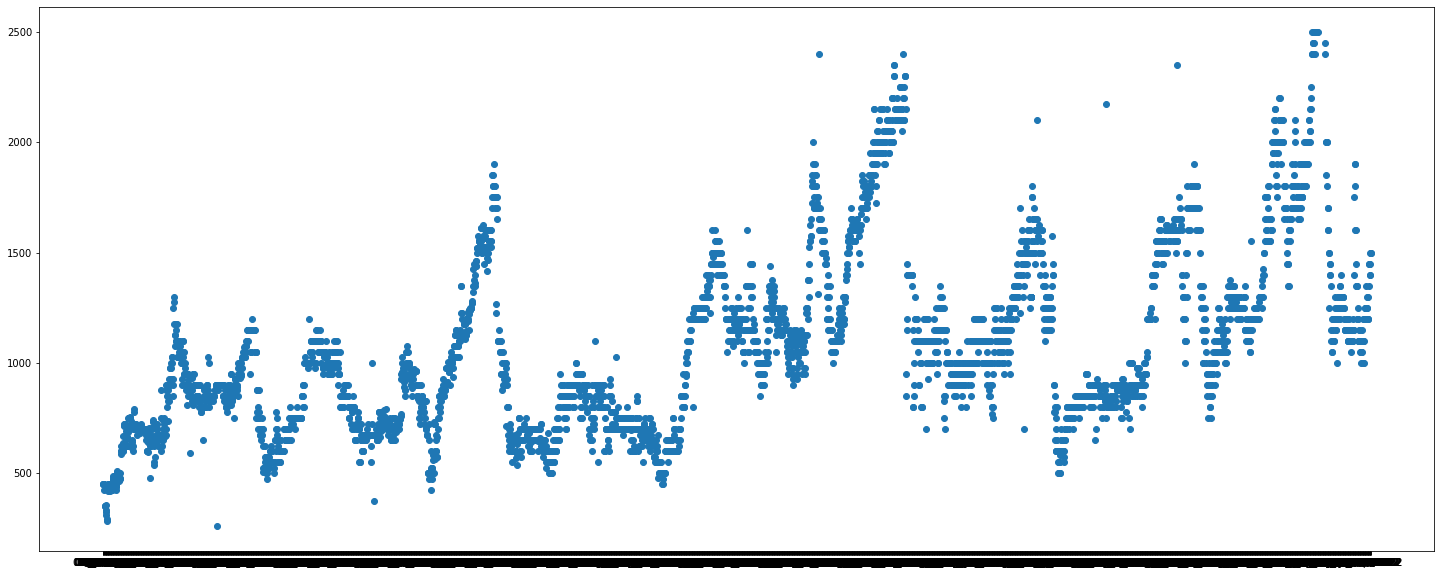

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25,10))
plt.scatter(df['ds'],df_new['y'])
plt.show()

In [ ]:
df_new.isnull().sum()

ds     0
y     28
dtype: int64

In [ ]:
!python -m pip install prophet
!pip install pystan
!pip install fbprophet

In [ ]:
import pandas as pd
from prophet import Prophet



In [ ]:
m = Prophet()
m.fit(df_new)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365,freq='D')
future.tail()

,ds
4672,2023-03-28
4673,2023-03-29
4674,2023-03-30
4675,2023-03-31
4676,2023-04-01


In [ ]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,699.460000,299.976051,953.171533,699.460000,699.460000,-95.499048,-95.499048,-95.499048,-16.445275,-16.445275,-16.445275,-79.053773,-79.053773,-79.053773,0.0,0.0,0.0,603.960952
1,2005-01-03,700.114780,244.121154,918.164120,700.114780,700.114780,-123.571083,-123.571083,-123.571083,-38.323872,-38.323872,-38.323872,-85.247212,-85.247212,-85.247212,0.0,0.0,0.0,576.543697
2,2005-01-05,700.769560,260.738714,895.711420,700.769560,700.769560,-120.077769,-120.077769,-120.077769,-31.217533,-31.217533,-31.217533,-88.860236,-88.860236,-88.860236,0.0,0.0,0.0,580.691791
3,2005-01-06,701.096950,260.904948,894.543469,701.096950,701.096950,-127.892561,-127.892561,-127.892561,-38.051325,-38.051325,-38.051325,-89.841236,-89.841236,-89.841236,0.0,0.0,0.0,573.204389
4,2005-01-07,701.424340,227.469116,910.334415,701.424340,701.424340,-126.603104,-126.603104,-126.603104,-36.235704,-36.235704,-36.235704,-90.367399,-90.367399,-90.367399,0.0,0.0,0.0,574.821237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,2023-03-28,1879.420246,1366.549860,2059.020718,1815.806078,1952.624783,-170.657435,-170.657435,-170.657435,-29.554118,-29.554118,-29.554118,-141.103317,-141.103317,-141.103317,0.0,0.0,0.0,1708.762811
4673,2023-03-29,1879.784658,1361.080590,2026.440709,1815.750044,1953.249494,-168.681816,-168.681816,-168.681816,-31.217533,-31.217533,-31.217533,-137.464283,-137.464283,-137.464283,0.0,0.0,0.0,1711.102842
4674,2023-03-30,1880.149070,1366.266942,2056.678984,1815.694010,1953.874205,-171.511285,-171.511285,-171.511285,-38.051325,-38.051325,-38.051325,-133.459960,-133.459960,-133.459960,0.0,0.0,0.0,1708.637785
4675,2023-03-31,1880.513482,1368.513221,2038.172339,1815.637977,1954.498917,-165.347339,-165.347339,-165.347339,-36.235704,-36.235704,-36.235704,-129.111634,-129.111634,-129.111634,0.0,0.0,0.0,1715.166144


<Figure size 1440x720 with 0 Axes>

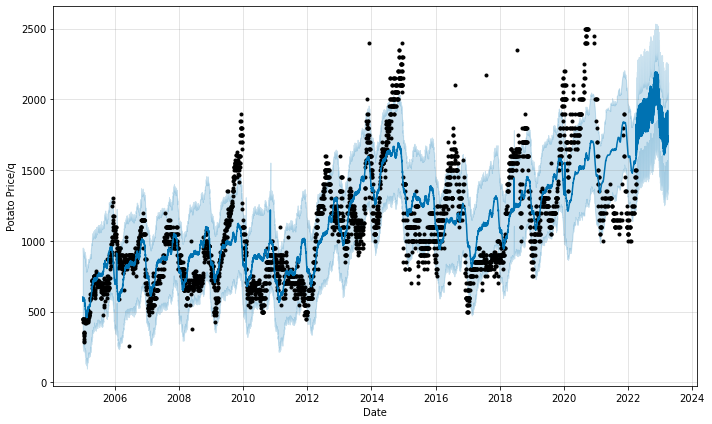

In [ ]:
plt.figure(figsize=(20,10))
m.plot(forecast,xlabel='Date',ylabel='Potato Price/q')
plt.show()